# GUI Force measurement setup - Structure of the code, current issues and next steps

# Purpose

This notebook is intended for users who want to make further development in the code. It explains the structure of the code, the functions associated to each section of the user manual and how to add more features, what are the current issues that are still to be addressed, and what are the future steps. It is mainly focused on the code associated to the motor stages. 

# Ressources and contacts

All the functions for the motor stages included in Pipython are in the folder Python/Install/PI_Application_Software/PIPython/PIPython-1.5.3.1/pipython.

Some examples using these functions are given in the folder Python/Install/PI_Application_Software/PIPython/PIPython-1.5.3.1/samples

The file Manual_GUI_ForceSetup.pdf explains how to install and use the GUI.

The ascii commands for the sensor are in the file AsciiCommandsheet.pdf

The Python GUI programming cookbook explains how to develop a GUI with tkinter.

If you have any queries concerning the motor stages, contact Manuel Mess from PI: M.Mess@pi.de

If you have any queries concerning the fibre optics sensor, contact Chris Osborne from Philtec: cosborne@philtec.com

# Structure of the code

## Architecture

All the files are in the folder Pistage/Python. The directory architecture is as follow:

├── **Install** <br>
├── **Methods** <br>
|   ├── Grids <br>
|   └── Standard_Methods <br>
├── **OutputFiles** <br>
|   ├── Andrea <br>
|   └── Freddie <br>
├── **Ressources** <br>
|   ├── AsciiCommandsheet.pdf <br>
|   └── Manual_GUI_ForceSetup.pdf <br>
|   └── pythonguiprogrammingcookbook.pdf <br>
├── **Scripts** <br>
|   ├── beams.yaml <br>
|   ├── calib.py <br>
|   ├── configtab.py <br>
|   ├── convert.py <br>
|   ├── forceconversion.py <br>
|   ├── gui.py <br>
|   ├── configtab.py <br>
|   ├── measure2.py <br>
|   ├── MotorStages.py <br>
|   ├── SaveStageDisp.py <br>
|   ├── save_Time.py <br>
|   └── sensor.py <br>
├── **ScriptsForDevelopment** <br>
|   ├── TestAdjustVelocity.py <br>
|   ├── TestMultiProcess.py <br>
|   └── TestRecordingXZ.py <br>
├── **ScriptsOldVersions**

The code is made of the following scripts:

- **beams.yaml:** List of beams that have been calibrated

- **calib.py:** Functions associated to the calibration of the beam

- **configtab.py:** Functions associated to the configuration of the sensor, such as the freauency of measurement

- **convert.py:** Functions converting the data stream into dictionaries

- **forceconversion.py:** Functions defining the conversion between the distance and the force

- **gui.py:** GUI for the sensor only

- **Main.py:** Main programme defining the GUI and functions associated to stage connection, method and definition, and position recording. The controller settings (stage and motor IDs, baudrate...) and some default variables (default velocity, initial position...) are also defined.

- **measure2.py:** Functions associated to force measurements (start and stop the stream, read the data...)

- **MotorStages.py:** Functions associated to stage movements (absolute/relative movements, stop)

- **SaveStageDisp.py:** Functions to create dictionaries containing data and metadata of a test (stage position)

- **save_Time.py:** Functions to convert data into dictionaries

- **sensor.py:** Functions associated to the sensor (connection, configuration...)

The method files are saved in the folders **Stantard_Methods** (method in a single location) and **Grids** (methods for grid of measurements). The output files are saved in the folder **OutputFiles** (with subfolders for each users). Some scripts have been written as first steps for further development- they are in the folder **ScriptsForDevelopment**.

## Definition of the motor and controller parameters

The motor and controller settings are defined in the section Motor and stage parameters in **Main.py** (line 102 - 139). 


**Changing the baudrate**: The Baudrate of the controllers is defined line 132 in **Main.py** and is set at 38400. As of now, it can be changed but it needs to be the same value for all the controllers. If different baudrates have to be used, a new key "Baudrate" can be added in the dictionaries defining the motor stages (motorX, motorY, motorZ). Bear in mind that it will imply making several changes in the code to take that into account: when the functions related to stage movement that takes the baudrate as an imput are called, replace Baudrate by motorX["Baudrate"] (or motorY["Baudrate"], motorZ["Baudrate"]).

In [2]:
# Baud Rate has to match the pins on each controller
BAUDRATE=38400

## Starting the programme, connection and initialisation

The following flow chart gives the structure of the code for the sensor and stage connection and initialisation of the stages when the script **Main.py** is run. The user input is in blue, the functions that are called are in bold, the script in which the function can be found is underlined, and the output is in red.

<img src="Connection2.png" width="600" align="center"/>

Connection and initialisation of the stages can also be done from the GUI once it is started. The following figure indicates the variables and functions associated to each label and button of the GUI. The functions are defined in **Main.py**, unless specified. For the labels and buttons related to stages Y and Z, replace X by Y or Z. 

<img src="GUI_Connection_Init.png" width="400" align="center"/>

### Sensor connection

When Main.py is run, the connection to the sensor is first made through the importation of the packages.

In [ ]:
import configtab as con
import calib as cal
import measure2 as meas
from sensor import sens

### Stage connection

Stage connection is defined by the function **ConnectStages()**. The function is called when running the programme. The programme will test each available USB port (except the one connected to the sensor) and will query the motor and controller IDs to associate the correct stage to the correct port. The list of port is obtained in sens.usb after connecting the sensor. When doing the connection, the query usually times out a few times, so there is a loop trying the connection 4 times or until all the stages are connected. 

In [ ]:
def ConnectStages():
	global Connect_Status_X
	global Connect_Status_Y
	global Connect_Status_Z

	# Get the list of available USB ports
	print("This is motor-stage USB list", sens.usb) #The programme connects to the sensor and gets the list of all available ports (sens.usb)

	# Find the device connected to each USB port and connect it
	Try_Connect = 0

	while Try_Connect<4: #It usually takes 3 attempts to find and connect to the stages (query times out a few times...)

		# Once all usb ports are found, it stops 
		if ((motorX['usb'] != ()) and (motorY['usb'] != ()) and (motorZ['usb'] != ())): 
			break

**<u>Issue that has been partially addressed:</u>**
Sometimes, the controller ID cannot be obtained for Y and Z stages. Instead, the output of the query is "DefaultStage". This is taken into account in the function (it is working because the motors are different). If it also happens with the stage X, the USB port will have to be found manually and added in the motor paremeters

In [ ]:
if ((stg == StageX) and ("C-863" in ctr)):
    motorX['usb'] = usbP
    print("    motorX", usbP)
elif (((stg == StageY) or (stg == DefaultStage)) and ("C-663" in ctr)):
    motorY['usb'] = usbP
    print("    motorY", usbP)
elif (((stg == StageZ) or (stg == DefaultStage)) and ("C-863" in ctr)):
    motorZ['usb'] = usbP
    print("    motorZ", usbP)

The variables Connect_Status hold the status of the connection for each stage and will be displayed in the GUI. If the connection of some of the stages fails, the function PopUp_Connect is called. Otherwise, the function PopUp_init is called for initiailisation

In [ ]:
if ("USB" in motorX['usb'])&("USB" in motorY['usb'])&("USB" in motorZ['usb']):
    PopUp_Init() # Pop up window to ask the user if they want to home the stages 
else:
    PopUp_Connect() #Pop up window to tell the user that at least one stage is not connected

### Stage initialisation

After the stages are connected, a window pops up asking the user to home the stages. This home position and the velocity for each stage are defined in Main.py (lines 87-94). If the user presses No, it will open the GUI without initialising. It can be useful if the programme needs to be stopped (or stops by itself) and is run again. If the user presses Yes, the stages are moved using the function deviceMoveAbsolutePos() in MotorStages.py. It takes the boolean argument "init", which is set as True if the stage needs to be initiated (done in the initialisation), and False if the stages do not need to be initiated (any movements done from the GUI)

In [ ]:
# Set the default velocity for stage movement (mm/s)
Default_Vel_X = 10
Default_Vel_Y = 1
Default_Vel_Z = 5

# Set the stage position for initialisation (mm)
Initial_Pos_X = 10
Initial_Pos_Y = 90
Initial_Pos_Z = 45

**<u>Issue that has not been addressed:</u>** Everytime the motors or controllers are unplugged and plugged in again, the stages need to be initiated through the function pitools.startup(). They are homed to their default initial position, which is X=0; Y=0; Z=0. If they have been initiated and the programme is run again, they will not be moved to this home position.    
**Potential solution:**
The function IsControllerReady(self) tests if the controller is ready. I would try changing the functions ConnectStages() and PopUp_Init() as follow. I cannot test if it is working.

In [ ]:
def ConnectStages():
	global Connect_Status_X
	global Connect_Status_Y
	global Connect_Status_Z

	# Get the list of available USB ports
	print("This is motor-stage USB list", sens.usb) #The programme connects to the sensor and gets the list of all available ports (sens.usb)

	# Find the device connected to each USB port and connect it
	Try_Connect = 0

	while Try_Connect<4: #It usually takes 3 attempts to find and connect to the stages (query times out a few times...)

		# Once all usb ports are found, it stops 
		if ((motorX['usb'] != ()) and (motorY['usb'] != ()) and (motorZ['usb'] != ())): 
			break

		# Connection to the stages 		
		else:
			print("Trying to connect to the stages...")
			for usbP in sens.usb:
				try:
					print("try to connect", usbP)
					gcs = GCSDevice()
					gcs.ConnectRS232(usbP, BAUDRATE)					
					print("    ",gcs.qIDN()) # Prints the controller ID connected to USB port
					print("    ",gcs.qCST()) # Prints the motor ID connected to USB port
					ctr = gcs.qIDN()
					stg = gcs.qCST()
					if ((stg == StageX) and ("C-863" in ctr)):
						motorX['usb'] = usbP
						print("    motorX", usbP)
						IsXready = gcs.IsControllerReady() #True is axes have been referenced, False otherwise
					elif (((stg == StageY) or (stg == DefaultStage)) and ("C-663" in ctr)):
						motorY['usb'] = usbP
						print("    motorY", usbP)
						IsYready = gcs.IsControllerReady() 
					elif (((stg == StageZ) or (stg == DefaultStage)) and ("C-863" in ctr)):
						motorZ['usb'] = usbP
						print("    motorZ", usbP)
						IsZready = gcs.IsControllerReady()
					gcs.CloseConnection()
					print("    Try", Try_Connect)	
					#sens.connection_check()
				except:
					print('    Not connected')
					print("    Try", Try_Connect)
					#sens.connection_check()
		Try_Connect = Try_Connect+1

	# Print the connection status
	if "USB" in motorX['usb']:
		Connect_Status_X.set("Connected")
	else:
		Connect_Status_X.set("Not connected")

	if "USB" in motorY['usb']:
		Connect_Status_Y.set("Connected")
	else:
		Connect_Status_Y.set("Not connected")

	if "USB" in motorZ['usb']:
		Connect_Status_Z.set("Connected")
	else:
		Connect_Status_Z.set("Not connected")
	
	Label_Connect_X.config(text=Connect_Status_X.get())
	Label_Connect_Y.config(text=Connect_Status_Y.get())
	Label_Connect_Z.config(text=Connect_Status_Z.get())

	# IF all the stages are connected, the function PopUp_Init is called to initialise the stages. If not
	# the user is warned about the connection status
	if ("USB" in motorX['usb'])&("USB" in motorY['usb'])&("USB" in motorZ['usb']):
        if (IsXready & IsYready & IsZready):
            PopUp_Init(True) # Arg True if the stages are referenced 
        else:
            PopUp_Init(False) # Arg False if the stages are referenced
	else:
		PopUp_Connect() #Pop up window to tell the user that at least one stage is not connected

In [ ]:
def PopUp_Init(Init):
	"""The function PopUp_Init() displays a pop up window to warn the user about the stage initialising
	If the user presses "yes", initialisation of the stages startsm they go to their home position
	If the user presses "no", the stages stay in their current position
	If user presses "cancel", the programme is closed 
	"""
    if init == True:
        # If the stages are referenced, it's just asking the user to home the stages
        answer = msg.askyesnocancel("Stage initialisation","Do you want to home the stages?")
        if answer:
            background(InitStage(motorX, BAUDRATE, Initial_Pos_X, Default_Vel_X))
            background(InitStage(motorY, BAUDRATE, Initial_Pos_Y, Default_Vel_Y))
            background(InitStage(motorZ, BAUDRATE, Initial_Pos_Z, Default_Vel_Z))
        if answer is None:
            root.destroy()
    else:
        answer = msg.askyesnocancel("Stage initialisation","Stages are going to be moved to position 0.0. Would you like to continue?")
        if answer:
            background(InitStage(motorX, BAUDRATE, Initial_Pos_X, Default_Vel_X))
            background(InitStage(motorY, BAUDRATE, Initial_Pos_Y, Default_Vel_Y))
            background(InitStage(motorZ, BAUDRATE, Initial_Pos_Z, Default_Vel_Z))
        else:
            root.destroy()


## Structure of the GUI

The title of the GUI is **Maria is the best**.<br> 
**It is absolutely forbidden to change this title** (unless it is something along the lines of *Aurélie and Maria are the best*).

The GUI is made of 5 different tabs, defined in **Main.py** for the **Test** and **Method Z measurement** tabs, in **configtab.py** for the **Configuration** tab, in **calib.py** for the **Calibration** tab, and in **measure2.py** for the **Measurement** tab (see below).

In [ ]:
tabControl = ttk.Notebook(root)
tab1 = tk.Frame(tabControl)
tabControl.add(tab1, text = 'Test')
tab2 = tk.Frame(tabControl)
tabControl.add(tab2, text = 'Method Z measurement')

configtab = con.ConfigTab(tabControl)
tabControl.add(configtab, text='Configuration')
calibtab = cal.CalibWindow(tabControl)
tabControl.add(calibtab, text='Calibration')
measuretab = meas.Measure(tabControl)
tabControl.add(measuretab, text='Measurements')

A new tab can be added using the function **tabControl.add()** (for example when adding the friction tests).

## Move the stages and stop

#### Stage movements

The following figure shows the variables and functions associated to each label/entry/button of the **Stage movement** frame. For the labels, entries and buttons related to stages X and Y, replace Z/z by X/x or Y/y. The functions are defined in **Main.py**, unless specified.

<img src="Frame_Movement.png" width="600" align="center"/>

Four different functions are defined in **MotorStage.py** for the stage movements: 

- **deviceMoveMinPos():** Moves to minimum position. An error often arises when moving to position 0.0, so the minimum position is set at 1.0 for all the stages. This values can be changed in the function (device.MOV(axis, 1.0)).

- **deviceMoveMaxPos():** Moves to maximum position of the stage, obtained through the query device.qTMX(). 

- **deviceMoveAbsolutePos():** Moves to absolute position. Before moving, the function checks if the final position is within the range of motion of the stage, through the queries device.qTMN() (min) and device.qTMX() (max).

- **deviceMoveRelativePos():** Moves to relative position. Before moving, the function checks if the final position is within the range of motion of the stage, through the queries device.qTMN() (min) and device.qTMX() (max).

All these functions are run in a thread defined in the function **background()** in **MoveStage.py**. Without this thread, the GUI would be disabled during stage movements.

### Update the current position at the end of the movement

At the end of each movement, the final position is updated in the GUI (variables CurPos_x, CurPos_y, CurPos_z). This is done using the function **Move_Update_Pos** defined in **Main.py**, which first moves the stage as defined by the function **Func_Move** (one of the 4 functions defined previously) and the arguments **arg_func**, and then calls the function GetCurPos_x(), GetCurPos_y() and GetCurPos_z() to update the labels label_CurPos_X, label_CurPos_Y, label_CurPos_Z in the GUI.

In [ ]:
def Move_Update_Pos(Func_Move,arg_func):
	""" Move_Update_Pos() allows stage movement (defined by the function "Func_Move" taking "arg_func" as arguments)
	and updates the current position on the GUI
	Func_Move : Function allowing a movement of the stage
	arg_func : arguments of the function 
	"""
	# Move the stage as defined by function Func_Move and arguments arg_func
	Func_Move(*arg_func)

	# Update position at the end of the movement
	try:		
		GetCurPos_x()
		GetCurPos_y()
		GetCurPos_z()
	except:
		print('unable to print position')

**<u>Current issue with position update</u>**: The function Move_Update_Pos() is not used when initialising the stages because it does not wait on target (see following section). So if the stages are moved back to their initial position (by clicking on StageX/Y/Z), the position will not be updated.

### Stop stage movements and wait on target

When a stage is moved, the function **waitontarget()** in pitools.py can be used, so that it waits until all closed loop 'axes' are on target. This is useful when defining a succession of movements. However, as long as the stage is not on target, other functions cannot be called, including functions to stop stage movements... It is possible to manually release the wait using the function **qONT()** to query the motion state of an axis. When the function **STP()** to stop stage movements is called, the query **qONT()** does not return any output. So I wrote a loop in which the motion state is queried until the target is reached, with an exception to stop stage movements and break the loop if this query does not return any output.

The stage often needs to be re-initialised after that.

In [ ]:
def deviceMoveMaxPos(active, BAUDRATE, vel=10, wait_target=False):
	""" Moves the stage to max position
	# active: motor
	# BAUDRATE: Baudrate of the controller
	# vel: velocity for the movement
	# wait_target: boolean, True if wait to reach the target before doing something else, False otherwise
	"""
	# Connection
	device=GCSDevice(active["ctr"])
	device.ConnectRS232(active["usb"], BAUDRATE)
	# Move stage
	for axis in device.axes:
		# Parameters query
		rangemax = device.qTMX()
		# Max position
		device.VEL(axis, vel)
		device.MOV(axis, rangemax[axis]) # Move to max pos
		if wait_target:
			ret=device.qONT(axis) # Query if target is reached
			ret = ret['1']
			while ret == False:
				try:
					ret=device.qONT(axis)[axis]
					position = device.qPOS(axis)[axis]
				except:
					device.STP(noraise=True)
					break

As far as I remember, the query **qONT()** does not work if the axes have not been referenced (e.g. when initialising after a controller/motor has been unplugged). So each stage movement takes the boolean input **wait_target** which is false for the initialisation phase. 

## Define and import a method for Z measurements

### Types of method and variables used

There will be 3 types of methods (stage movement control, displacement control, force control), but only the stage movement control has been implemented. Movements can be performed along X, Y, or Z axis, and position of the Z stage is recorded during the test.

The widget **Combobox_MethodType** contains the types of method. To add a new type of method or change the name of a method, update its values.

In [ ]:
Combobox_MethodType = ttk.Combobox(frame_method)
Combobox_MethodType['values'] = ('Stage movement','Displacement control','Force control')

The label that will be displayed to specify the force or displacement value when defining the method is defined by **values_LabelValue**. 

In [ ]:
values_LabelValue = np.array(['Displacement (mm)','Displacement (um)','Force (mN)'])

The list of widgets that will be displayed when creating/importing a method are defined in the following lists.

In [ ]:
# Widgets used to create methods
Combobox_Type = [] #Type can be preload, move stage, or hold
Combobox_Stage = [] # Stage X, Y, or Z
entry_Value = [] # Can be value of displacement, deflection, or force depending on the method
entry_Velocity = [] # Used for preload
entry_Time = [] # Duration of segment or preload

The types of segments are defined in the variable **values_Combobox_Type**. To add a new type of segment, add it to the list.

In [ ]:
# Values of the combobox/label for the type of segment/method
values_Combobox_Type = ('','Move stage','Hold','Preload')

The value set by the user for each widget and each segment is stored in the following lists. If not relevant (i.e. List_Value for hold segment), it will take the value 'na'. These lists are used to plot the method (**PlotMethod()**) and save the method (**Get_Method()**).

In [ ]:
# List containing the widgets variables
List_Types = [] # Type of segment
List_Stages = [] # Stage to be moved
List_Value = [] # Target value for movement (force or displacement)
List_Vel = [] # Velocity for the movement
List_Time = [] # Duration of the segment or duration of the hold for the preload

### Define a new method

The following flow chart shows the process to create a new method. User inputs are in blue, variables and functions are in bold (all defined in **Main.py**) and the outputs are in red.

<img src="DefineNewMethod2.png" width="600" align="center"/>

### Import an existing method

The following flow chart shows the process to import an existing method. User inputs are in blue, variables and functions are in bold (all defined in **Main.py**) and the outputs are in red.

<img src="ImportMethod.png" width="300" align="center"/>

### Save the method

The following flow chart shows the process to save a method. User inputs are in blue, variables and functions are in bold (all defined in **Main.py**) and the outputs are in red.

<img src="SaveMethod.png" width="170" align="center"/>

### How to add more features in the method definition

If you want to add a new widget (for example for a new type segment), you would have to change the following functions: Start_Method(), Add_Step(), Remove_Step(), Display_Method(), callback(), Plot_Method(), Get_Method(), Method_Grid_Plot, Test_Stage_Movement() (Yes I know... Maybe there was an easier way to do this).

Bear in mind that it may change the format of the file defining the method and the previous method files will not be able to be read.

### Combining different types of control in a single method file

It is currently not possible to combine different types of method (e.g. one segment in force control, one segment in stage position control...). To do so, a widget would probably have to be added in the method definition, or the current widget  **Combobox_MethodType** can be changed into a list of widgets and integrated to the grid of segments. A list **List_MethodTypes** would have to be created to store the values.

## Define a grid of measurements

A grid of measurement can be defined from a method file. To do so, 3 variables are used.

In [15]:
Dict_Method = [] #Contains method with default parameters
Dict_Grid = [] #Contains method with updated parameters for each segment
Dict_Final = {} #Final dictionary for the grid

### Create a grid from a method

The following flow chart shows the process to create a grid from a method. User inputs are in blue, variables and functions are in bold (all defined in **Main.py**) and the outputs are in red. The function **SetMethod()** is explained further.

<img src="DefineGrid.png" width="600" align="center"/>

### Modify parameters of the grid and save

The following flow chart shows the process to modify the parameters of the method in a given location of the grid and how to save. User inputs are in blue, variables and functions are in bold (all defined in **Main.py**) and the outputs are in red. The function **Show_Prev_Point()** is explained further.

<img src="UpdateGrid.png" width="600" align="center"/>

### Import a grid

It is not possible to import a grid when importing a method. The function **Import_Method()** could be modified, or a new function for a grid can be written.

## Run a test from a method file

A test is run from a method file (in the yaml format). So far, only the function for stage position control has been implemented.

### Open a method file

The following flow chart shows the process to open a method file and display the content of the method. User inputs are in blue, variables and functions are in bold (all defined in **Main.py**) and the outputs are in red. 

<img src="OpenMethod.png" width="300" align="center"/>

### Read the method file, beam settings, and call test function

The following flow chart shows the process to read a method file before running a test. User inputs are in blue, variables and functions are in bold (defined in **Main.py** unless specified) and the outputs are in red. 

<img src="ReadMethod.png" width="600" align="center"/>

### Perform test when stage movement is controlled

The function **Test_Stage_Movement()** is called to run a test when the movement of the stage is controlled (no PID). The following flow chart shows the process to perform a test from the method file defining the successive segments. The functions are in bold (defined in **Main.py** unless specified) and the outputs are in red. 

<img src="Test_Move_Stage.png" width="600" align="center"/>

**<u>Checking range of motion: potential improvements</u>**: 

At the beginning of the test, the method file is read to determine the maximum velocity, and the minimum and maximum position along Z axis. The test is not performed if the position and/or the velocity are out of range.
Some improvements can be made:
* It does not include the preload, for which the amount of displacement is not known.

* It is only done for Z movements. Another function can be written for X and Y following the same principle. This would be useful for a grid of measurement.

### Recording and plotting force signal

Force measurements are started when the function **start_measuring()**, defined in **Main.py**, is called. The buffer data is read in the function **make_buffer1()**, which contains a thread so that the signal can be plotted in parallel. The following flow chart shows the process to start the measurements, read out the buffer, store the data and plot the force in real time. The functions and variables are in bold, the name of the scripts in which the functions are defined are underlined, and the outputs are in red.

<img src="ReadBuffer.png" width="600" align="center"/>

The class **Sensor** in **sensor.py** contains the sensor configuration. Some of these parameters are defined by the user in the **Configuration** tab, such as the frequency of measurement.

<a id='IssueFrequency'></a>

**<u>Current issues with force measurements</u>**:
* **High frequency measurements**: the frequency is currently limited to 10Hz. This is due to the ASCII stream mode, which is slower than the binary mode. It takes around 0.07s to read out the data (**sens.sens.readline()**). So if you increase the frequency, the time data (which is calculated based on the frequency that is selected by the user) will not be correct. To have an idea of the actual frequency, I added the variable **timereal** which takes the value corresponding to the time when the data is read (see function **make_buffer1()** below. This *actual* time value is added in the output file. The company is going to release an update to increase the frequency in ASCII mode- it should work at 100Hz. Once the update is installed, the function **sens.sens.readline()** can be timed by uncommenting the line *print("time for reading", afterreading-beforereading)* 
* **Changing frequency**: the frequency can be changed using the variable avgDef. This value is loaded into the sensor at power up or reboot. So if the value is changed from the GUI, it will not be taken into account unless the GUI is closed and run again. A function rebooting the sensor could be written and called when the user click on **set**. 

In [ ]:
def make_buffer1(self):
        """uses ascii streaming, """
        self.time_init = time.time()
        def run():
            print("bufferthread started")
            while self.running == True:                
                beforereading = time.time()
                ans = sens.sens.readline()
                #print(ans)
                afterreading = time.time()
                #print("time for reading", afterreading-beforereading) 
                d = con.append_to_streamdict(sens.emptystreamdict, ans,sens.channel)
                self.streamerror = d[1]
                f = sens.make_forcelist() 
                if self.streamerror == False:            
                        #print(d)
                    if len(sens.timelist) == 0:
                        #sens.timelist.append(self.sampleperiod)
                        sens.timelist.append(0)
                        sens.timereal.append(time.time()-self.time_init)
                        #print(sens.timelist)
                        #print(sens.forcelist)
                    else:
                        sens.timelist.append(sens.timelist[len(sens.timelist)-1]+ self.sampleperiod)
                        #print('sens list', sens.timelist)                        
                        sens.timereal.append(time.time()-self.time_init)
                        #print('Real time', sens.timereal)               
                afterprocessing = time.time()
                ##print('time for reading: ', afterreading-beforereading)
                ##print('time for processing: ',afterprocessing -afterreading)
                self.deflectionlist=[]
                for i in sens.emptystreamdict['distn']:
                    self.deflectionlist.append(i-FC.tare)
            print("bufferthread stopped")
            ans = sens.sens.readlines()
            print(ans)
            print(len(ans))
        self.bufferthread = Thread(target=run)
        self.bufferthread.start()

<a id='Preload'></a>

### Preload

A preload function has been written. It moves the stage, using the function **MVR()** with an arbitrary value of displacement, at a constant **Velocity**, until the **Force_Target** is reached. The force signal is got using **sens.forcelist[-1]**. Once the target is reached, the movement is stopped using the function **STP()**. The stage is then hold for the duration defined by **Time_Preload**.

In [ ]:
def Preload(device, Force_Target, Time_Preload, Velocity = 0.5):
	""" Preload function - the stage moves at a constant velocity until a force threshold is reached. 
	# device: stage that needs to be moved
	# Force_Target: value of the preload
	# Time_Preload: Holding time for the preload (as of nowm the stage movement is stoppedm which does not garanty that the force will be holded)
	# Velocity: velocity with which thr stage is moved
	"""
	# Get initial force 
	Force_Init = sens.forcelist[-1] 
	Force = Force_Init

	# Move the stage until preload is reached
	for axis in device.axes:
		device.VEL(axis,Velocity)
		background(device.MVR(axis,20)) # the value 20mm is arbitrary- the movement will actually stop when the force target is reached
	while (abs(Force-Force_Init)<Force_Target):
		Force = sens.forcelist[-1]

	# Stop stage, update current position and hold the preload
	device.STP(noraise=True)
	GetCurPos_z()
	time.sleep(Time_Preload)

<a id='IssuePreload'></a>

**<u>Issues with the preload function</u>**:

* The force is not hold, but instead the stage position is hold. Holding the force would require a PID. 

* The value 20mm used in the function MVR() can be out of range depending on the initial position of the stage (especially if the preolad requires movement of the X stage). This can be changed in the code. The value can be defined according to the current position of the stage and which stage is moving.

### Visualisation of test progression

The segment being performed is displayed at the bottom of the **Test** tab using the variable **Current_Segment**. Its value is updated everytime the segment is changed (see example below for a preload). 

In [ ]:
Current_Segment.set('Point {} - Performing segment: {}, Stage: {}, Velocity: {:.2f}, Hold for: {:.2f} seconds'.format(Grid_Point+1, item, Stg, Vel, t_hold))

### Record stage position

Recording stage position is done using the data recorder of the PI device defined in the PI script **datarectools.py**. An example on how to use the data recorder is given in **datarecorder.py**. It is set up using the class **Datarecorder**. 

This class is created for the Z stage inside the function defining a test and the recording options are defined in the function **recorddata1()**.

In [ ]:
drec = datarectools.Datarecorder(deviceZ)
recorddata1(drec, NUMVALUES, RECRATE)

The number of values **NUMVALUES** is set to 1000, which is the maximum number of points that can be recorded by the controller. The frequency **RECRATE** is defined by the user and is hold by the variable **entry_freq**. The default frequency is set to 20Hz. These values are defined in **Main.py**. 

In [ ]:
# Number of points and frequency of recording
NUMVALUES = 1000  # number of data sets to record as integer
RECRATE = 20  # number of recordings per second, i.e. in Hz

If the frequency is too high compared to the duration of the test, it is adjusted using the function **Get_Recrate()**. This function calculates the duration of the test from the method and adjust the frequency if needed.

In [ ]:
def Get_Recrate(List, freq):
	"""The function Get_Recrate() calculates the frequency of recording based on the duration of the test 
	The maximal number of points that can be recorded is 1024 
	# List: dictionary containing the method
	# freq: frequency set by the user
	"""	
	global NUMVALUES

	# Calculate duration of the test (does not include the preload...)
	Duration_Test = 0
	for item, doc in List.items():
		Type = doc.get('Type')
		if (Type == "Move stage"):
			Duration_Test = Duration_Test + abs(doc.get('Value'))/doc.get('Velocity')
		elif (Type == "Hold"):
			Duration_Test = Duration_Test + doc.get("Duration")	
	Duration_Test = Duration_Test+2 # Add 2 seconds to make sure the whole test is recorded

	# Calculate the number of values necessary to cover the whole test with the desired frequency
	num_val = freq*Duration_Test

	# Decrease the frequency if the test is too long
	if num_val > NUMVALUES:
		RECRATE = int(NUMVALUES/Duration_Test)
		print("Recrate: ", RECRATE)	
	else:
		RECRATE = freq

	return RECRATE

Recording of the position is initiated using the function **arm()**. It activates the trigger defined in the options (in the function **recorddata1()**). It is possible to request the recording to start once the stage moves. However, when doing this, I found that the recording stops once the stage stops moving, which is not ideal when doing a succesion of segments. So in the current code, the recording starts when the function **arm()** is run, inside the **Test_Stage_Movement()** function

In [ ]:
# Start measurements and performing the test
start_measuring(tabControl,measuretab)	# Force measurements + record
drec.arm() # Record position
time.sleep(1) # wait for 1s so that force measurements start before the test

The function **processdata()** was given by the company as an example to read the data at the end of the test. It uses the function **data()**. 

In [ ]:
def processdata(drec):
    """Read out, plot and save data recorder data.
    @type drec : pipython.datarectools.Datarecorder
    """
    if pyplot is None:
        print('matplotlib is not installed')
        return
    pyplot.plot(drec.timescale, drec.data[0], color='red')
    pyplot.plot(drec.timescale, drec.data[1], color='blue')
    pyplot.xlabel('time (s)')
    pyplot.ylabel(', '.join((drec.header['NAME0'], drec.header['NAME1'])))
    pyplot.title('Datarecorder data over time')
    pyplot.grid(True)
    pyplot.show()
    print('save GCSArray to file "gcsarray.dat"')
    pitools.savegcsarray('gcsarray.dat', drec.header, drec.data)

I tried using this function, but I faced 2 problems:
* For some reason, the maximum number of points that could be recorded was aroung 370. I emailed the company to report this issue, but they were not able to identify the problem (it happened for any velocity and any duration of the test)
* The data cannot be read until all the data has been recording (i.e. once **NUMVALUES** is reached, which does not allow a real time feedback of the position.

I used the function **read()** instead. It takes the following inputs:
* offset : Start point in the table as integer, starts with index 1, overwrites self.offset.
* numvalues : Number of points to be read per table as integer, overwrites self.numvalues.
* verbose : If True print a line that shows how many values have been read out already.
The data can be read before the end of the recording. I tried to write a function with a thread to run the data recording in parallel of the test function, but it has not been successful: the stages moved after the recording was ended. So data reading is currently done inside the test function **Test_Stage_Movement()** for the hold segment and inside the function **deviceRelativePosRec()** for the Move stage segment (combined with the "wait on target" loop).

In [ ]:
if wait_target:
    ret=device.qONT(axis) # Returns if target is reached
    ret = ret['1']
    while ret == False:
        try:
            # Qurey if position is reached
            ret=device.qONT(axis)[axis]
            position = device.qPOS(axis)[axis]
            # Record position data
            try:
                Data_Pos = drec.read(numvalues=offset_reading-1,offset=offset_rec)
                offset_rec = offset_rec+offset_reading
                for i in (Data_Pos[1][0]):
                    PosRec.append(i)
                print("PosRec: ", PosRec)
            except:
                offset_rec = offset_rec
        except:
            device.STP(noraise=True) # When the stages are stopped, the current position cannot be obtained
            break

**offset_reading** defines the number of points that are read at a time and is equal to the frequency of recording, while **offset_rec** defines the position of first value to be read. This value is updated everytime data is read. 
The last recorded values are read at the end of the test.

In [ ]:
for k in range(100):
    try:
        Data_Pos = drec.read(numvalues=10,offset=offset_rec)									
        for i in (Data_Pos[1][0]):
            PosRec.append(i)
        offset_rec = offset_rec+10
    except:
        break

<a id='IssueRecording'></a>

**<u>Issues with position recording</u>**:

* **Reading the data and maximum number of points**: The current way of reading the data during the test is not ideal and will not work when implementing PID for displacement control (Stage displacement - beam deflection) or when recording the position of several stages simultaneously. The number of points that can be read at the end seems to be limited to 370, while it is 1024 when reading the data during the test. I tried writing a separate function in a thread to start recording and read the data, but the test would not start. I also tried multiprocessing with queues, but it does not work when the function **qONT()** (wait on target) is used (the test stops as soon as the recording starts- it seems that functions related to querying the current position do not work in parallel of reading the data). It would be worth investigating further why the number of points that are recorded/can be read at the end of the recording is 370. If this is issue is solved, the data could be read at the end of the test instead of inside the function.

* **Recording the position of several stages simultaneously**: Only Z position is recorded for now. The position of several stages can be recorded simultaneously (see example below). In this example, the data is processed at the end with only 300 recording points. 

* **Getting stage position in real time**: I emailed the company, the C-863.11 controller does not have a real-time interface. The data recording tools cannot be used to get the real time data (I tried, but it takes 0.1s to read the data using the function **read()** and I do not know how to read it in real time). The function **qPOS()** can be used to get the current position- it takes 0.03s which may still be too long for a PID.  

* **Recording for a grid of measurements**: I have not implemented the recording for a grid of measurement (the entire test cannot be recorded in one go, as the number of points is highly limited). A potential solution would be to create a new recording class when the method segment is **Go to**, and save the data from the previous point. 

* **Stop recording**: I do not know if their is a way to stop the recording once the test is finished- for now, the recording continues until the number of recording points is reached.

**<u>Recording the position of several stages simultaneously: first steps</u>**

I here give an example of how to record the position of X and Z simultaneously and process the data at the end of the test (can also be found in the script **TestRecordingXZ.py**. 

Required packages:

In [ ]:
try:
    from matplotlib import pyplot
except ImportError:
    pyplot = None
from pipython import GCSDevice, pitools, datarectools
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import csv
import time

I first define the functions to set up the data recorder and process the data.

In [ ]:
def recorddata(drec):
    """Set up data recorder to record 2 tables for first axis after next motion command.
    @type drec : pipython.datarectools.Datarecorder
    """
    drec.numvalues = NUMVALUES #Number of values to be recorded
    drec.samplefreq = RECRATE #Frequency of recording 
    print('data recorder rate: {:.2f} Hz'.format(drec.samplefreq))
    drec.options = (datarectools.RecordOptions.ACTUAL_POSITION_2,
                    datarectools.RecordOptions.COMMANDED_POSITION_1)
    drec.sources = drec.gcs.axes[0]    

def processdata(drec, filename):
    """Read out, plot and save data recorder data.
    @type drec : pipython.datarectools.Datarecorder
    """
    if pyplot is None:
        print('matplotlib is not installed')
        return
    pyplot.plot(drec.timescale, drec.data[0], color='red')
    pyplot.plot(drec.timescale, drec.data[1], color='blue')
    pyplot.xlabel('time (s)')
    pyplot.ylabel(', '.join((drec.header['NAME0'], drec.header['NAME1'])))
    pyplot.title('Datarecorder data over time')
    pyplot.grid(True)
    pyplot.show()
    print('save GCSArray to file ', filename)
    pitools.savegcsarray(filename, drec.header, drec.data)

Then I connect the two stages.

In [ ]:
BAUDRATE = 38400

motorZ =	{
"ctr": 'C-863.11',
"stg": 'M-404.6PD',
"usb": '/dev/ttyUSB0',
"ref": 'FNL',
"axMot": 'Z',
}

motorX =	{
"ctr": 'C-863.11',
"stg": 'M-404.1PD',
"usb": '/dev/ttyUSB2',
"ref": 'FNL',
"axMot": 'X',
}

deviceZ=GCSDevice(motorZ["ctr"])
deviceZ.ConnectRS232(motorZ["usb"], BAUDRATE)
deviceX=GCSDevice(motorX["ctr"])
deviceX.ConnectRS232(motorX["usb"], BAUDRATE)

I define the number of values to be recorded (only 300 to be below the limit of 370 that I noticed) and the frequency.

In [ ]:
NUMVALUES = 300
RECRATE = 30

I create two recording classes and call the function **recorddata()** to set up the the data recorders. This function is very long (a few seconds) so I start the recording (using **arm()** only after calling the function for each stage).

In [ ]:
drecX = datarectools.Datarecorder(deviceX)
drecZ = datarectools.Datarecorder(deviceZ)
recorddata(drecX)
recorddata(drecZ)
drecX.arm()
drecZ.arm()

I then define 2 successive movements. The X stage is moved by 5mm at 1mm/s and the Z stage is moved by 10mm at 5mm/s. 

In [ ]:
print('move stage X on axis {}...'.format(deviceX.axes[0]))
deviceX.VEL(deviceX.axes[0],1)
deviceX.MVR(deviceX.axes[0], 5)
pitools.waitontarget(deviceX, axes=deviceX.axes[0])
print('move stage Z on axis {}...'.format(deviceZ.axes[0]))
deviceZ.VEL(deviceZ.axes[0],5)
deviceZ.MVR(deviceZ.axes[0], 10)
pitools.waitontarget(deviceZ, axes=deviceZ.axes[0])

At the end of the sequence of movements, I process the data.

In [ ]:
processdata(drecX, 'RecordingX.dat')
processdata(drecZ, 'RecordingZ.dat')

Results:

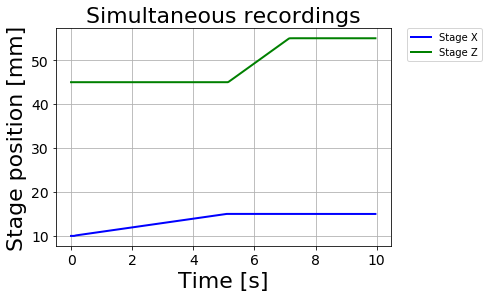

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Data = pd.read_csv('RecordingXZ.csv')
plt.figure(1)
StageXPlot = plt.plot(np.array(Data.Time), np.array(Data.PosX), 'b', linewidth=2.0, label='Stage X')        
StageZPlot = plt.plot(np.array(Data.Time), np.array(Data.PosZ), 'g', linewidth=2.0, label='Stage Z')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Time [s]', fontsize=22)
plt.ylabel('Stage position [mm]', fontsize=22)
plt.title('Simultaneous recordings', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True)
plt.show()

The position of both stages is recorded. However, the function **arm()** takes around 0.04s for the X stage and 0.03s for the Z stage, so there is a shift in the recording between both stages. The functions should ideally be run simultaneously.

### Save data

Test metadata and data are saved in a csv file when the user clicks on **save as** in the **Measurement** tab. The following flow chart shows the process to create and save the output file. The user inputs are in blue, the functions are in bold, the scripts in which the functions are defined are underlined, and the outputs are in red. 

<img src="SaveData.png" width="800" align="center"/>

Sometimes, the GUI crashes during the test- data is still being recorded but the button **save as** cannot be pressed (and hence the data cannot be saved). I wrote the function **savealldatatemp()**, which is very similar to **savealldata()** except that it calls save_with_metadata_temp in save.py and saves the data in the directory **OutputFile** (or in the working directory if **OuputFile** does not exist). The name of the file is *test_temp.csv*. This function is called in **stop_measuring()** when the test is finished, so that data is automatically saved.

<a id='IssueFileGrid'></a>

<u>**Issue with output file: case of a grid**</u>

The output file contains the data of the entire test, which will not be ideal for a grid. The easiest way to deal with a grid would probably be to create a csv file for each location. A function similar as **stopmeasuring()** can be written- the difference would be that the name of the file should be different in each location, so that the previous file is not deleted. Another option would be to create an array/list/dictionary containing the data rather than a file, so that it can be saved at the end with a chosen filename. This function would be called at the beginning of a segment **Go to** and the function **startmeasuring()** would be called at the end of the same segment to start measurements for the same point. Something similar would be done for the recording of stage position.

### Stop the test before the end

A test can be stopped before the end by clicking on **STOP TEST**. The button **button_stop_met** calls the function **Stop_Test()**, which:
* creates the test data for the stage position using the function **StageDisp_To_Dict()** defined in **Save_Stage_Disp.py**, 
* stops force measurement and saves the data in a temporary file using the function **stop_measuring()**, 
* stops all stage movements using the function **StopStages()** defined in **MotorStage.py**, 
* activates the thread **stop_event** so that the test stops. Without this thread, the current stage movement would stop but the following segments defined in the method would be performed.

In [ ]:
def Stop_Test():
	""" The function creates the test data for the output file, stops force measurementsm saves data, stops the stages
	and stops the test 
	"""
	global testdata
	global testmetadata
	global PosRec
	global RECRATE

	# Create the data array for the output file (for the stages)
	Time = list(np.arange(0,(1/RECRATE)*len(PosRec),(1/RECRATE)))
	testdata = StageDisp_To_Dict(Time,PosRec)

	# Stop recordings and movements
	stop_measuring(measuretab)	
	StopStages(motors)
	stop_event.set()

# Summary of the main issues

The main issues that would have to be addressed 
- [**Frequency of force measurement**](#IssueFrequency): the frequency is currently limited to 10Hz. An update for the sensor will be released to reach 100Hz and will have to be installed.
- [**Stage position recording**](#IssueRecording): the way it is currently done is working in stage movement control, but it will have to be modified when doing displacement control, or simultaneous movements (i.e. recording the position of more than one stage) 
- [**Preload**](#IssuePreload): it will have to include a PID to maintain the force (it is currently holding the position of the stage)
- [**Data recording**](#IssueRecording) **and** [**output file**](#IssueFileGrid) **for a grid of measurements**: The data recording starts at the beginning of the test and ends at the end. The output file contains the data for the entire test. Something different might be needed for a grid (e.g. different files for each location)

# Future steps

## PID for force and displacement control

The functions for force and displacement control have not been written yet, but the option is available in the GUI to create a method file. Once the function is written, it will be called in the function **Read_method()**. 

In [ ]:
# Perform test depending on type of control
if any(Combobox_MethodType['values'][0] in d.values() for d in List.values()): # if stage movement
    Test_Stage_Movement(List, Initial_Pos, PosZ_init, filename, List_Mot, BAUDRATE, stop_event,tabControl, measuretab)
elif any(Combobox_MethodType['values'][1] in d.values() for d in List.values()): # if displacement (stage displacement - deflection) control
    print("Displacement control function not written yet")
elif any(Combobox_MethodType['values'][2] in d.values() for d in List.values()): # if force control
    print("Force control function not written yet")

The function [**Preload()**](#Preload) shows how to get the force signal while moving a stage. To get the deflection, replace **sens.forcelist[-1]** by **emptystreamdict['distn']**. Either the position of the stage or the velocity can be controlled. To adjust the velocity of the stage, use the function **VEL()**. I checked, the velocity can be changed while the stage is moving (see **TestAdjustVelocity.py** for an example).

Some PID controllers are available in Python, such as **simple-pid** (https://pypi.org/project/simple-pid/).

The main difficulty currently would be to get feedback on stage position in real time. One solution would be to query the current stage position using the function qPOS(). This query takes 0.03s, which may still be too long for a "real time" feedback.

## Simultaneous movements

Simultaneous movements can be done using multiprocessing. I have already taken some first steps. I used the **Queue** class, which can store any Python object and is useful for sharing data between processes. Queues can be passed as a parameter to a Process' target function to enable the process to consume data. By using put() function we can insert data to then queue and using get() we can get items from queues. I did some tests in the script **TestMultiprocess.py**. I will explain below.

### Move 3 stages simultaneously

The **Queue** class is contained in the multiprocessing package

In [ ]:
import multiprocessing

I define the movement function- here a relative displacement. In the function, I record the stage position to make sure the movements are performed at the correct velocity. I also check that all the movements start at the same time, using **time_init** which will be the time when the script is run.

In [ ]:
# Moves the stage to relative position disp with velocity vel
def deviceRelativePos1(device, disp, vel, wait_target, time_init):
	""" Moves the stage to relative position disp with velocity vel
	# device: device of the stage
	# disp: displacement reuested for the stage
	# vel: velocity for the movement
	# wait_target: boolean, True if wait to reach the target before doing something else, False otherwise
	"""
	for axis in device.axes:
		print(time_init)
		InitialPos = device.qPOS(axis)[axis]
		print('initial position on axis {} is {:.2f}'.format(axis, InitialPos))
		target = InitialPos+disp
		rangemin = device.qTMN()
		rangemax = device.qTMX()
		time_pos = []
		pos = []
		# Make sure movement is within the range 
		if (target>rangemin[axis] and target<rangemax[axis]):
			print('move axis {} to {:.2f}'.format(axis, target))
			device.SVO(axis,True)
			device.VEL(axis, vel)
			device.STE(axis, disp)
			# Wait on target
			if wait_target:
				ret=device.qONT(axis) # Query if taget is reached
				ret = ret['1']
				while ret == False:
					try:
						ret=device.qONT(axis)[axis]
						position = device.qPOS(axis)[axis]
						time_pos.append(time.time()-time_init)
						pos.append(position)
					except:
						device.STP(noraise=True)
						break
			print("stop moving time: ",time.time())
			FinalPos = device.qPOS(axis)[axis]
			print('current position of axis {} is {:.2f}'.format(axis, FinalPos))
			time_init = time.time()
		else:
			print('Position out of limits')
	print("time_pos: ", time_pos)
	print("pos: ",pos)
#--------------------------------------------------------------------------------------------------------        
def deviceMoveRelativePos1(active, BAUDRATE, disp, vel=4.0, wait_target=False, time_init=0):
	""" Moves the stage to relative position target with velocity vel
	# active: motor
	# BAUDRATE: Baudrate of the controller
	# disp: displacement requested for the stage
	# vel: velocity for the movement
	# wait_target: boolean, True if wait to reach the target before doing something else, False otherwise
	"""
	device, axis, rangemin, rangemax = deviceSettings(active, BAUDRATE)
	deviceRelativePos1(device, disp, vel, wait_target, time_init)

I then define the 3 functions that I want to be run in parallel. These functions take **queue** as an argument, which will contain the motor parameters, the velocity of the test, and the initial time (I chose these parameters as an example). These arguments are accessed using **queue.get()**

In [ ]:
def MoveX(queue):
	Dict_Test = queue.get()
	mot = Dict_Test["motor"]
	vel = Dict_Test["vel"]
	time_init = Dict_Test["time_init"]
	deviceMoveRelativePos1(mot, 38400, 10, vel, True, time_init)
	time.sleep(5)
	deviceMoveRelativePos1(mot, 38400, -10, vel, True, time_init)

def MoveY(queue):
	Dict_Test = queue.get()
	mot = Dict_Test["motor"]
	vel = Dict_Test["vel"]
	time_init = Dict_Test["time_init"]
	deviceMoveRelativePos1(mot, 38400, -10, vel, True, time_init)
	deviceMoveRelativePos1(mot, 38400, 10, vel, True, time_init)

def MoveZ(queue):
	Dict_Test = queue.get()
	mot = Dict_Test["motor"]
	vel = Dict_Test["vel"]
	time_init = Dict_Test["time_init"]
	deviceMoveRelativePos1(mot, 38400, 10, vel, True, time_init)
	deviceMoveRelativePos1(mot, 38400, -10, vel, True, time_init)

I define the stage parameters and connect the stages.

In [ ]:
# Stage parameters
BAUDRATE = 38400

motorZ =	{
"ctr": 'C-863.11',
"stg": 'M-404.6PD',
"usb": '/dev/ttyUSB0',
"ref": 'FNL',
"axMot": 'Z',
}

motorY =	{
	"ctr": 'C-663.11',
	"stg": 'M-403.42S',
	"usb": '/dev/ttyUSB3',
  	"ref": 'FNL',
	"axMot": 'Y',
}

motorX =	{
"ctr": 'C-863.11',
"stg": 'M-404.1PD',
"usb": '/dev/ttyUSB2',
"ref": 'FNL',
"axMot": 'X',
}

# Connection
deviceX=GCSDevice(motorX["ctr"])
deviceX.ConnectRS232(motorX["usb"], BAUDRATE)
deviceY=GCSDevice(motorY["ctr"])
deviceY.ConnectRS232(motorY["usb"], BAUDRATE)
deviceZ=GCSDevice(motorZ["ctr"])
deviceZ.ConnectRS232(motorZ["usb"], BAUDRATE)

Then I define the arguments of the functions that will be put in the queue. I created dictionaries.

In [ ]:
time_init = time.time()

dictX = {
	"motor": motorX,
	"vel": 5,
	"time_init": time_init,
}

dictY = {
	"motor": motorY,
	"vel": 1,
	"time_init": time_init,
}

dictZ = {
	"motor": motorZ,
	"vel": 1,
	"time_init":time_init,
}

Multiprocessing starts by defining 3 processes- one for each function- and passing the arguments to the queues.

In [ ]:
queue = multiprocessing.Queue()

## Processes
process1 = multiprocessing.Process(target=MoveX, args=[queue])
process1.start()

process2 = multiprocessing.Process(target=MoveY, args=[queue])
process2.start()

process3 = multiprocessing.Process(target=MoveZ, args=[queue])
process3.start()

# arguments of the functions put in the queues
queue.put(dictX)
queue.put(dictY)
queue.put(dictZ)

**Results**

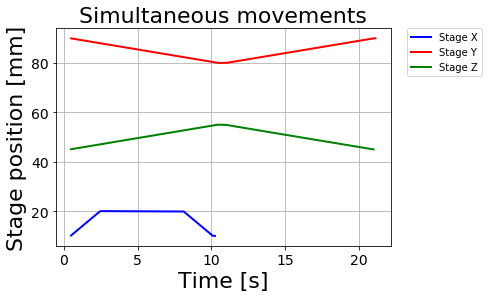

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Data = pd.read_csv('SimultaneousMovements3FunctionsOutput.csv')
plt.figure(1)
StageXPlot = plt.plot(np.array(Data.TimeX), np.array(Data.StageX), 'b', linewidth=2.0, label='Stage X')        
StageYPlot = plt.plot(np.array(Data.TimeY), np.array(Data.StageY), 'r', linewidth=2.0, label='Stage Y')
StageZPlot = plt.plot(np.array(Data.TimeZ), np.array(Data.StageZ), 'g', linewidth=2.0, label='Stage Z')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Time [s]', fontsize=22)
plt.ylabel('Stage position [mm]', fontsize=22)
plt.title('Simultaneous movements', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True)
plt.show()

In [43]:
print("Initial time X is: ", Data.TimeX[0], "s")
print("Initial time Y is: ", Data.TimeY[0], "s")
print("Initial time Z is: ", Data.TimeZ[0], "s")

Initial time X is:  0.496457815 s
Initial time Y is:  0.50394845 s
Initial time Z is:  0.5008935929999999 s


The 3 movements are done simultaneously and start within 0.0075s (Woop woooooop!!!).

### How to do simultaneous movements in force control

Simultaneous movements will be needed when moving the X and/or Y stages in force control, as the position of the Z stage will have to be adjusted to have the correct force. The easiest way would probably be to have one function for the PID and one function for the movement of the stage (X and/or Y) and run them simultaneously using **Queues**. It is already possible to do movements along X or Y from the GUI. I also give an example on how to run 2 method files simultaneously in **TestMultiprocess.py**

### Record the position of several stages

It is currently not possible to record the position of several stages simultaneously. Multiprocessing might work, but I have not tried. This will require changing the way the position is recorded (i.e. a separate function rather than reading the data inside the test function).

In [8]:
import nbconvert
import os
os.system('jupyter nbconvert --to html --EmbedImagesPreprocessor.embed_images=True GUI_manual.ipynb')

0